# Evaluating Shortest Path Finder for Maze using A* and DFS Algorithm



Algorithm used = A* Algorithm


Given Maze
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  1  1  1  1  1  1  1  1  1  0  0  1  1  1  1  1  1  1
0  0  1  0  0  0  0  0  0  0  1  0  0  1  0  0  0  1  0  0
0  0  1  0  0  0  0  0  0  0  1  1  1  1  0  0  0  1  1  1
0  0  1  0  0  0  0  0  0  0  1  0  0  1  0  0  0  1  0  1
0  0  1  1  1  1  0  0  0  0  1  0  0  1  1  1  1  1  0  1
0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  1
0  0  0  1  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  1
0  0  0  1  0  1  1  1  1  0  1  0  0  0  0  0  1  1  1  1
0  0  1  1  0  1  0  0  1  0  1  1  1  1  1  0  1  0  0  0
0  0  1  0  1  1  0  0  1  0  0  0  0  0  1  0  1  1  1  1
0  0  1  0  1  1  1  0  1  0  0  0  0  0  1  0  1  0  0  0
1  1  1  1  0  0  1  0  1  0  0  0  0  0  1  0  0  0  1  1
0  0  1  0  0  0  1  0  1  0  0  0  0  0  1  1  1  1  1  0
0  0  1  1 

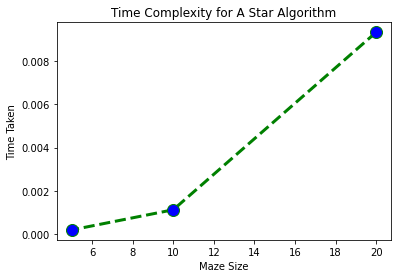

Algorithm used = DFS



 Given Maze
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
0  0  1  1  1  1  1  1  1  1  1  0  0  1  1  1  1  1  1  1
0  0  1  0  0  0  0  0  0  0  1  0  0  1  0  0  0  1  0  0
0  0  1  0  0  0  0  0  0  0  1  1  1  1  0  0  0  1  1  1
0  0  1  0  0  0  0  0  0  0  1  0  0  1  0  0  0  1  0  1
0  0  1  1  1  1  0  0  0  0  1  0  0  1  1  1  1  1  0  1
0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  1
0  0  0  1  0  0  0  0  1  1  1  0  0  0  0  0  0  0  0  1
0  0  0  1  0  1  1  1  1  0  1  0  0  0  0  0  1  1  1  1
0  0  1  1  0  1  0  0  1  0  1  1  1  1  1  0  1  0  0  0
0  0  1  0  1  1  0  0  1  0  0  0  0  0  1  0  1  1  1  1
0  0  1  0  1  1  1  0  1  0  0  0  0  0  1  0  1  0  0  0
1  1  1  1  0  0  1  0  1  0  0  0  0  0  1  0  0  0  1  1
0  0  1  0  0  0  1  0  1  0  0  0  0  0  1  1  1  1  1  0
0  0  1  1  1  1  1 

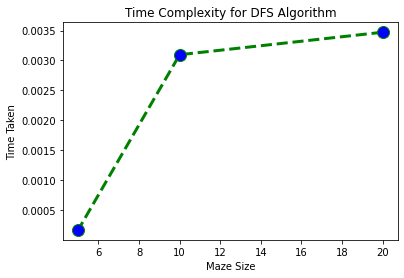





 Comparison Graph for A* and DFS




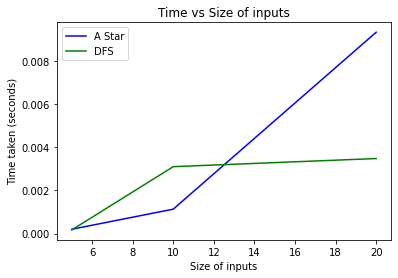

In [32]:
import matplotlib.pyplot as plt
import queue
import time
import numpy
# to keep track of the blocks of maze
class Grid_Position:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# each block will have its own position and cost of steps taken
class Node:
    def __init__(self, pos: Grid_Position, cost):
        self.pos = pos
        self.cost = cost

    def __lt__(self, other):
        if self.cost < other.cost:
            return True
        else:
            return False

def heuristic_value(curr_node,dest):
    return (abs(curr_node.x-dest.x)+abs(curr_node.y-dest.y))


def A_Star(maze, end, start):
    # Create lists for open nodes and closed nodes
    open1 = queue.PriorityQueue()
    closed = [[False for i in range(len(maze))]
                      for j in range(len(maze))]
    closed[start.x][start.y] = True

    #using these cell arrays to get neighbours
    adj_cell_x = [-1, 0, 0, 1]
    adj_cell_y = [0, -1, 1, 0]

    # Create a start node and an goal node
    Start = Node(start, 0)
    goal = Node(end, 0)

    # Add the start node
    open1.put((0, Start))
    cost = 0
    cells = 4

    # Loop until the open list is empty
    while open1:

    # Sort the open list to get the node with the lowest cost first
    # no need cuz priority queue
    # Get the node with the lowest cost

        current = open1.get()       #getting least cost node as open1 is a priority queue
        current_node = current[1]   #getting node in cuurent node
        current_pos = current_node.pos

    # Add the current node to the closed list
        if current_node not in closed:
            closed[current_pos.x][current_pos.y] = True
            print((current_pos.x,current_pos.y),end="")           
            cost = cost + 1
            
    # Check if we have reached the goal, return the path (From Current Node to Start Node By Node.parent)
        if current_pos.x == end.x and current_pos.y == end.y:
            print("\n\nNo. of moves utilized = ", cost)
            return current_node.cost

        x_pos = current_pos.x
        y_pos = current_pos.y

    # Get neighbours
        for i in range(cells):
            if x_pos == len(maze) - 1 and adj_cell_x[i] == 1:
                x_pos = current_pos.x
                y_pos = current_pos.y + adj_cell_y[i]
                post = Grid_Position(x_pos, y_pos)
            if y_pos == 0 and adj_cell_y[i] == -1:
                x_pos = current_pos.x + adj_cell_x[i]
                y_pos = current_pos.y
                post = Grid_Position(x_pos, y_pos)
            else:
                x_pos = current_pos.x + adj_cell_x[i]
                y_pos = current_pos.y + adj_cell_y[i]
                post = Grid_Position(x_pos, y_pos)
            if x_pos < 20 and y_pos < 20 and x_pos >= 0 and y_pos >= 0:
                if maze[x_pos][y_pos] == 1:
                    if not closed[x_pos][y_pos]:
                        neighbor = Node(Grid_Position(x_pos, y_pos), current_node.cost + 1)
                        h = heuristic_value(neighbor.pos, end)      #get heuristic value of neighbours
                        f = h + neighbor.cost           #getting f by f-score = heuristic + g-score
                        closed[x_pos][y_pos] = True     #adding neighbour to closed
                        open1.put((f, neighbor))
    return -1

###################
# to keep track of the blocks of maze
class Grid_Position:
    def __init__(self, x, y):
        self.x = x
        self.y = y

# each block will have its own position and cost of steps taken
class Node1:
    def __init__(self, pos: Grid_Position, cost):
        self.pos = pos
        self.cost = cost


def create_node1(x, y, c):
    val = Grid_Position(x, y)
    return Node1(val, c + 1)

#dfs algo for maze
def dfs(Grid, dest: Grid_Position, start: Grid_Position):
    adj_cell_x = [1, 0, 0, -1]
    adj_cell_y = [0, 1, -1, 0]
    m, n = (len(Grid), len(Grid))
    visited_blocks = [[False for i in range(m)]
               for j in range(n)]
    visited_blocks[start.x][start.y] = True
    stack = deque()
    sol = Node1(start, 0)
    stack.append(sol)
    neigh = 4
    neighbours = []
    cost = 0
    while stack:
        current_block = stack.pop()
        current_pos = current_block.pos
        if current_pos.x == dest.x and current_pos.y == dest.y:
            print("\n\n\nTotal nodes visited = ", cost)
            return current_block.cost
        x_pos = current_pos.x
        y_pos = current_pos.y
     
        for i in range(neigh):
            if x_pos == len(Grid) - 1 and adj_cell_x[i] == 1:
                x_pos = current_pos.x
                y_pos = current_pos.y + adj_cell_y[i]
            if y_pos == 0 and adj_cell_y[i] == -1:
                x_pos = current_pos.x + adj_cell_x[i]
                y_pos = current_pos.y
            else:
                x_pos = current_pos.x + adj_cell_x[i]
                y_pos = current_pos.y + adj_cell_y[i]
            if x_pos != 20 and x_pos != 0 and y_pos != 20 and y_pos != 0:
                if Grid[x_pos][y_pos] == 1:
                    if not visited_blocks[x_pos][y_pos]:
                        print((current_pos.x,current_pos.y),end="")   
                        cost += 1
                        visited_blocks[x_pos][y_pos] = True
                        stack.append(create_node1(x_pos, y_pos, current_block.cost))
    return -1


def main():
    maze = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
             [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
             [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
             [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1],
             [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
             [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
             [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
             [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1],
             [0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0],
             [0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
             [0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
             [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
             [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
             [0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
    maze1 = [[1,1,1,0,0,0,0,0,0,0],
             [1,1,1,1,1,1,1,1,1,0],
             [0,0,0,0,0,0,0,1,1,0],
             [0,1,1,1,1,1,1,1,1,0],
             [0,1,1,0,0,0,0,1,1,0],
             [0,1,1,1,1,1,0,1,1,0],
             [0,0,0,0,0,0,0,1,1,0],
             [0,1,1,0,0,0,0,1,1,0],
             [0,1,1,1,1,1,0,1,1,0],
             [0,0,0,0,0,0,0,1,1,0]
             ]
    maze2 = [[1,1,1,0,0,0,0],
             [1,1,1,1,1,1,0],
             [0,1,1,0,0,0,0],
             [0,1,1,1,1,1,0],
             [1,0,0,0,1,0,1],
             [1,0,0,0,1,0,1],
             [0,0,0,0,1,1,1]]
   
    starting_position = Grid_Position(14, 0)
    destination = Grid_Position(12, 19)
    res1 = 0
    res2 = 0
    res3 = 0
    test_cases = [20,10,5]
    time_best = []
    print("\n\nAlgorithm used = A* Algorithm")
    print("\n\nGiven Maze")
    for line in maze:
        print ('  '.join(map(str, line)))
    print("\nPath : ")
    start = time.time()
    res1 = A_Star(maze, destination, starting_position)
    end = time.time()
    print("Time Taken for 20 x 20 Maze : ",end-start)
    time_best.append(end-start)
    if res1 != -1:
       print("\nPath cost = ", res1)
    else:
       print("\nPath does not exit")
    
    print("\n\n\n Given Maze")
    for line in maze1:
        print ('  '.join(map(str, line)))
    print("\nPath : ")
    starting_position_1 = Grid_Position(1, 0)
    destination_1 = Grid_Position(9, 7)
    start = time.time()
    res2 = A_Star(maze1, destination_1, starting_position_1)
    end = time.time()
    print("Time Taken for 10 x 10 Maze : ",end-start)
    time_best.append(end-start)

    if res2 != -1:
       print("\nPath cost = ", res2)
    else:
       print("\nPath does not exit")
    
    
    print("\n\n\n Given Maze")
    for line in maze2:
        print ('  '.join(map(str, line)))
    print("\nPath : ")
    starting_position_2 = Grid_Position(1, 0)
    destination_2 = Grid_Position(1, 2)
    start = time.time()
    res3 = A_Star(maze2, destination_2, starting_position_2)
    end = time.time()
    print("Time Taken for 7 x 7 Maze : ",end-start)
    time_best.append(end-start)

    if res3 != -1:
       print("\nPath cost = ", res3)
    else:
       print("\nPath does not exit")
    

    plt.plot(test_cases, time_best, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
    plt.xlabel('Maze Size')
    plt.ylabel('Time Taken')
    plt.title('Time Complexity for A Star Algorithm')
    
    plt.show()
    
    time_comp = []
    print("Algorithm used = DFS")
    print("\n\n\n Given Maze")
    for line in maze:
        print ('  '.join(map(str, line)))
    print("\nPath : ")
    starting_position = Grid_Position(14, 0)
    destination = Grid_Position(12, 19)
    start = time.time()
    res = dfs(maze, destination, starting_position)
    end = time.time()
    time_comp.append(end-start)
    
    if res != -1:
        print("Path Cost for Maze = ", res)
    else:
        print("\n\nPath does not exit")
        
    print("\n\n\n Given Maze")
    for line in maze1:
        print ('  '.join(map(str, line)))

    print("\nPath : ")
    starting_position1 = Grid_Position(1, 0)
    destination1 = Grid_Position(9, 7)
    
    start = time.time()
    res1 = dfs(maze1, destination1, starting_position1)
    end = time.time()
    time_comp.append(end-start)
    
    if res1 != -1:
        print("\n\nPath Cost for Maze = ", res1)
    else:
        print("\n\nPath does not exit")
        
    print("\n\n\n Given Maze")
    for line in maze2:
        print ('  '.join(map(str, line)))
    
    print("\nPath : ")
    starting_position2 = Grid_Position(1, 0)
    destination2 = Grid_Position(1, 2)
    
    start = time.time()
    res2 = dfs(maze2, destination2, starting_position2)
    end = time.time()
    time_comp.append(end-start)
    
    if res2 != -1:
        print("\n\nPath Cost for Maze = ", res2)
    else:
        print("\n\nPath does not exit")
        
    print("\n\nTime Complexity:",time_comp)
    
    plt.plot(test_cases, time_comp, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
    plt.xlabel('Maze Size')
    plt.ylabel('Time Taken')
    plt.title('Time Complexity for DFS Algorithm')
    
    plt.show()
    
    print("\n\n\n\n Comparison Graph for A* and DFS\n\n")
    x,=plt.plot(test_cases, time_best,color="b")
    y,=plt.plot(test_cases,time_comp,color="g")
    plt.xlabel('Size of inputs')
    plt.ylabel('Time taken (seconds)')
    plt.title('Time vs Size of inputs')
    plt.legend([x,y],["A Star","DFS"])
    plt.show()
    
if __name__ == '__main__':
    main()
